In [122]:
# import libraries

import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

In [118]:
# 1. Finding the Eigenvalues and Eigemvectors
# assign matrix A

A = np.array([[4, 0, 1], [-1, -6, -2], [5, 0, 0]])
A

array([[ 4,  0,  1],
       [-1, -6, -2],
       [ 5,  0,  0]])

In [119]:
# 1a. Is vector 'u' and eigenvector of A?

u = np.array([[1], [2], [3]])
v = A @ u
v

array([[  7],
       [-19],
       [  5]])

Vector u is not an eigenvector of A because it is not a scalar multiple.


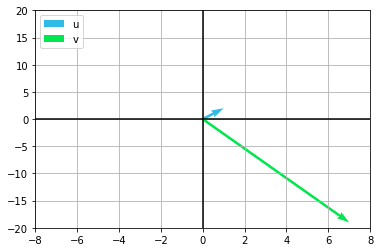

In [120]:
# 1a. Is vector 'u' and eigenvector of A?

print('Vector u is not an eigenvector of A because it is not a scalar multiple.')
plt.grid()
plt.axvline(x = 0, c = "black")
plt.axhline(y = 0, c = "black")
plt.xlim(-8, 8)
plt.ylim(-20, 20)
plt.quiver(0, 0, u[0], u[1], color = "#2EBCE7", angles = 'xy', scale_units = 'xy', scale = 1, label = "u")
plt.quiver(0, 0, v[0], v[1], color = "#00E64E", angles = 'xy', scale_units = 'xy', scale = 1, label = "v")
plt.legend(loc = "upper left")

plt.show()

In [74]:
# 1b. Is vector 'a' and eigenvector of A?

a = np.array([[0], [1], [0]])
b = A @ a
b

array([[ 0],
       [-6],
       [ 0]])

Vector a is an eigenvector with an eigenvalue of -6.


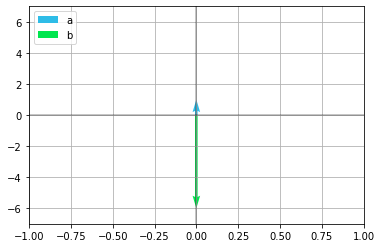

In [116]:
# 1b. Is vector 'a' and eigenvector of A?

print('Vector a is an eigenvector with an eigenvalue of -6.')
plt.grid()
plt.axvline(x = 0, c = "black", alpha = .3)
plt.axhline(y = 0, c = "black", alpha = .3)
plt.xlim(-1, 1)
plt.ylim(-7, 7)
plt.quiver(0, 0, a[0], a[1], color = "#2EBCE7", angles = 'xy', scale_units = 'xy', scale = 1, label = "a")
plt.quiver(0, 0, b[0], b[1], color = "#00E64E", angles = 'xy', scale_units = 'xy', scale = 1, label = "b")
plt.legend(loc = "upper left")

plt.show()

In [87]:
# 1c. Find all eigenvalues and eigenvectors of A

w, v = eig(A)
print('Eigenvalues:', w)
print('Eigenvectors:', v)

Eigenvalues: [-6.  5. -1.]
Eigenvectors: [[ 0.          0.69431384 -0.18493168]
 [ 1.         -0.18935832 -0.33287702]
 [ 0.          0.69431384  0.9246584 ]]


In [89]:
# 2. Principal Component Analysis

# import data
vg_data = pd.read_csv('C:/Users/corri/OneDrive/Desktop/video_game_data.csv')
vg_data.head()

,name,critic_score,user_score,total_shipped
0,Mario Kart Wii,8.2,9.1,37.14
1,Wii Sports Resort,8.0,8.8,33.09
2,New Super Mario Bros.,9.1,8.1,30.80
3,New Super Mario Bros. Wii,8.6,9.2,30.22
4,Mario Kart DS,9.1,9.4,23.60


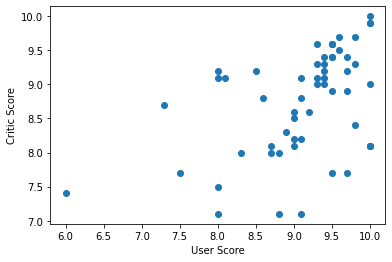

In [113]:
# 2a. Make a scatterplot of user scores versus critics scores

plt.scatter(vg_data['user_score'], vg_data['critic_score'])
plt.xlabel('User Score')
plt.ylabel('Critic Score')

plt.show()

In [123]:
# 2b. sketch the approximate directions of the first and second principal components

# create data matrix with two variables
X = np.array([vg_data['user_score'], vg_data['critic_score']]).T
X.shape

(57, 2)

In [124]:
# compute covariance matrix of data

C = np.cov(X, rowvar = False)
C

array([[0.60490602, 0.27559211],
       [0.27559211, 0.59682331]])

In [125]:
# calculate eigenvectors and eigenvalues of covariance matrix

eigvals, eigvecs = np.linalg.eig(C)
eigvals, eigvecs

(array([0.8764864 , 0.32524293]),
 array([[ 0.71227196, -0.7019036 ],
        [ 0.7019036 ,  0.71227196]]))

In [126]:
# store eigenvectors as u and v

u = eigvecs[:, 0].reshape(-1, 1)
v = eigvecs[:, 1].reshape(-1, 1)
u, v

(array([[0.71227196],
        [0.7019036 ]]),
 array([[-0.7019036 ],
        [ 0.71227196]]))

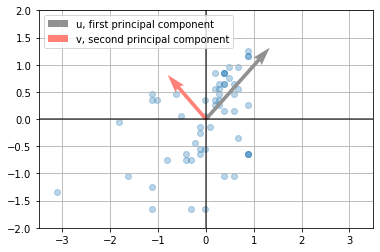

In [128]:
# plot first and second principal components using vector length of three standard deviations

X_centered = X - X.mean(axis = 0)

plt.quiver(0, 0,
          2 * np.sqrt(eigvals[0]) * u[0], 2 * np.sqrt(eigvals[0]) * u[1], color = "#919191", angles = 'xy',
           scale_units = 'xy', scale = 1, zorder = 2, width = 0.011, label = "u, first principal component")
plt.quiver(0, 0,
          2 * np.sqrt(eigvals[1]) * v[0], 2 * np.sqrt(eigvals[1]) * v[1], color = "#FF8177", angles = 'xy',
          scale_units = 'xy', scale = 1, zorder = 2, width = 0.011, label = "v, second principal component")

plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha = .3)
plt.grid()
plt.axvline(x = 0, c = "black", alpha = .7)
plt.axhline(y = 0, c = "black", alpha = .7)
plt.xlim(-3.5, 3.5)
plt.ylim(-2, 2)
plt.legend(loc = "upper left")

plt.show()